<a href="https://colab.research.google.com/github/Deadline430/SL_REPORT_2025/blob/main/Hotel_Booking_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare the packages for this project



In [1]:
# --- Installation Commands ---
# Run these commands if you don't have the necessary packages installed in your environment.
!pip install --upgrade pandas scikit-learn matplotlib numpy plotly psutil scipy torch memory_profiler resource tensorflow

# --- Import Required Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, learning_curve, validation_curve, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import pointbiserialr
import time
import platform
import psutil
import resource
import torch
import memory_profiler
import tensorflow as tf


print("\n--- Environment Information ---")
print(f"Python Version: {platform.python_version()}")
print(f"System: {platform.system()} {platform.release()}")
print(f"Processor: {platform.processor()}")
print(f"Total RAM: {round(psutil.virtual_memory().total / (1024**3), 2)} GB")


--- Environment Information ---
Python Version: 3.12.11
System: Linux 6.1.123+
Processor: x86_64
Total RAM: 50.99 GB


## View and Preprocessing the Dataset


### Dataset Overview

In [ ]:
df=pd.read_csv('hotel_bookings.csv')
# Display the first 5 rows of the DataFrame
pd.set_option('display.max_columns', None)
display(df.head())
# Get information about the DataFrame, including data types and non-null values
display(df.info())
# Get descriptive statistics for numerical columns
display(df.describe())
# Get descriptive statistics for categorical columns
display(df.describe(include='object'))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

None

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


### Handle the missing values

In [ ]:
# Impute missing values in 'company' and 'agent' columns with 0
df['company'] = df['company'].fillna(0)
df['agent'] = df['agent'].fillna(0)

# Find the most frequent country
most_frequent_country = df['country'].mode()[0]

# Impute missing values in 'country' column with the most frequent country
df['country'] = df['country'].fillna(most_frequent_country)

# Impute missing values in 'children' column with 0
df['children'] = df['children'].fillna(0)

print("Missing values after imputation:")
display(df[['company', 'agent', 'country', 'children']].isnull().sum())
# Verify that the missing values have been imputed in all relevant columns

Missing values after imputation:


,0
company,0
agent,0
country,0
children,0


### Handling Invalid Data and Outliers




In [ ]:
# IF the sum of adults, children and babies is zero, this record provide no useful info and need to be removed
# Remove rows where the sum of adults, children, and babies is zero
df = df[(df['adults'] + df['children'] + df['babies']) > 0]

# Check the records after removing non-sense data
print(f"After removing no useful info: {df.shape}")

After removing no useful info: (119210, 32)


In [ ]:
# Create a box plot for the 'adr' column to visualize outliers
fig = px.box(df, y='adr')

# Update layout for better readability
fig.update_layout(
    title='Box plot of ADR (Average Daily Rate)',
    yaxis_title='ADR'
)

# Display the plot
fig.show()

# Remove outlier rows where adr is greater than 5000
df = df[df['adr'] <= 5000].copy()

# Remove rows where adr is 0 unless market_segment is Complementary
df = df[~((df['adr'] == 0) & (df['market_segment'] != 'Complementary'))].copy()

# Display the shape of the updated DataFrame
print(f"DataFrame shape after removing ADR > 5000 and specific ADR=0 cases: {df.shape}")

DataFrame shape after removing ADR > 5000 and specific ADR=0 cases: (118064, 32)


In [ ]:
# There are very few "undefined" value under market_segment and distribution_channel features
# Remove the records to reduce features after one-hot encoding

df = df[df['market_segment'] != 'Undefined'].copy()
df = df[df['distribution_channel'] != 'Undefined'].copy()

# Display the shape of the updated DataFrame to verify the rows have been removed
display(df.shape)

(118059, 32)

### Data Leakage Prevention

In [ ]:
# Remove 'reservation_status' and 'reservation_status_date' columns
df = df.drop(['reservation_status', 'reservation_status_date'], axis=1)

# Display the shape of the updated DataFrame to verify the columns have been removed
display(df.shape)

(118059, 30)

### Handling High-Cardinality Categorical Features

In [ ]:

global_cancellation_mean = df['is_canceled'].mean()

# Calculate the mean of the target variable for each country
country_cancellation_mean = df.groupby('country')['is_canceled'].mean()

# Define the smoothing parameter (alpha). A higher alpha means more smoothing towards the global mean.
alpha = 5

# Calculate the smoothed mean for each country
# Formula: (count * category_mean + alpha * global_mean) / (count + alpha)
country_counts = df['country'].value_counts()
smoothed_country_cancellation = (country_cancellation_mean * country_counts + alpha * global_cancellation_mean) / (country_counts + alpha)

# Map the smoothed values back to the DataFrame
df['country_encoded'] = df['country'].map(smoothed_country_cancellation)

# Display the first few rows with the new encoded column
display(df[['country', 'country_encoded', 'is_canceled']].head(10))

,country,country_encoded,is_canceled
2,GBR,0.203119,0
3,GBR,0.203119,0
4,GBR,0.203119,0
5,GBR,0.203119,0
6,PRT,0.571031,0
7,PRT,0.571031,0
8,PRT,0.571031,1
9,PRT,0.571031,1
10,PRT,0.571031,1
11,PRT,0.571031,0


In [ ]:
country_counts

,count
country,
PRT,48099
GBR,12071
FRA,10361
ESP,8498
DEU,7249
...,...
MRT,1
KIR,1
SDN,1


In [ ]:
# Select the remaining categorical columns (excluding 'country' and the target variable if it's still an object type)
categorical_cols_for_onehot = df.select_dtypes(include='object').columns.tolist()

# Remove 'country' from the list as it has already been encoded
categorical_cols_for_onehot.remove('country')

# Apply one-hot encoding to the selected categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols_for_onehot, drop_first=True) # drop_first=True avoids multicollinearity

# Display the first few rows and the shape of the new DataFrame to show the encoded features
display(df_encoded.head())
display(df_encoded.shape)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,country_encoded,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
2,0,7,2015,27,1,0,1,1,0.0,0,GBR,0,0,0,0,0.0,0.0,0,75.0,0,0,0.203119,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,13,2015,27,1,0,1,1,0.0,0,GBR,0,0,0,0,304.0,0.0,0,75.0,0,0,0.203119,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,0,14,2015,27,1,0,2,2,0.0,0,GBR,0,0,0,0,240.0,0.0,0,98.0,0,1,0.203119,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5,0,14,2015,27,1,0,2,2,0.0,0,GBR,0,0,0,0,240.0,0.0,0,98.0,0,1,0.203119,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
6,0,0,2015,27,1,0,2,2,0.0,0,PRT,0,0,0,0,0.0,0.0,0,107.0,0,0,0.571031,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


(118059, 70)

## Exploratory Data Analysis

### Distribution of Booking Cancellation

In [ ]:
# Calculate the distribution of the target variable 'is_canceled'
cancellation_distribution = df['is_canceled'].value_counts()

# Calculate the percentage distribution
cancellation_percentage = df['is_canceled'].value_counts(normalize=True) * 100

print("Distribution of Booking Cancellation:")
display(cancellation_distribution)
print("\nPercentage Distribution of Booking Cancellation:")
display(cancellation_percentage)


Distribution of Booking Cancellation:


,count
is_canceled,
0,73969
1,44090



Percentage Distribution of Booking Cancellation:


,proportion
is_canceled,
0,62.654266
1,37.345734


### Analyze numerical features impact on cancellation

In [ ]:
from scipy.stats import pointbiserialr

# Identify numerical columns (excluding the target and the already encoded country)
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('is_canceled')
numerical_cols.remove('country_encoded') # Exclude the encoded country column

# Calculate point-biserial correlation for each numerical column
correlations = {}
for col in numerical_cols:
    correlation, _ = pointbiserialr(df_encoded[col], df_encoded['is_canceled'])
    correlations[col] = correlation

# Print the correlation coefficients, sorted by absolute value
print("Point-Biserial Correlation with 'is_canceled':")
for col, corr in sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True):
    print(f"{col}: {corr:.4f}")

Point-Biserial Correlation with 'is_canceled':
lead_time: 0.2919
total_of_special_requests: -0.2374
required_car_parking_spaces: -0.1973
booking_changes: -0.1445
previous_cancellations: 0.1097
company: -0.0838
is_repeated_guest: -0.0783
adults: 0.0581
previous_bookings_not_canceled: -0.0576
days_in_waiting_list: 0.0544
agent: -0.0464
adr: 0.0367
babies: -0.0330
stays_in_week_nights: 0.0207
arrival_date_year: 0.0148
arrival_date_week_number: 0.0092
arrival_date_day_of_month: -0.0060
stays_in_weekend_nights: -0.0051
children: 0.0046


#### Based on above EDA on numerical data, "lead_time", "total_of_special_requests", "required_car_parking_spaces", and “booking_changes” appear to have relatively stronger linear relationships (~0.2) with is_canceled.

## Analyze categorical features


In [ ]:
# Select categorical columns (excluding 'country' as it has been encoded)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'country' in categorical_cols:
    categorical_cols.remove('country')

# Iterate through categorical columns and calculate cancellation rates
print("Cancellation Rate by Category:")
for col in categorical_cols:
    print(f"\nFeature: '{col}'")
    # Calculate cancellation rate (mean of 'is_canceled') for each category
    cancellation_rate_by_category = df.groupby(col)['is_canceled'].mean().reset_index()
    cancellation_rate_by_category = cancellation_rate_by_category.rename(columns={'is_canceled': 'cancellation_rate'})
    display(cancellation_rate_by_category)
    print("-" * 30)

Cancellation Rate by Category:

Feature: 'hotel'


,hotel,cancellation_rate
0,City Hotel,0.420221
1,Resort Hotel,0.280377


------------------------------

Feature: 'arrival_date_month'


,arrival_date_month,cancellation_rate
0,April,0.410107
1,August,0.379869
2,December,0.355884
3,February,0.336892
4,January,0.307705
5,July,0.377485
6,June,0.416536
7,March,0.324185
8,May,0.400171
9,November,0.316458


------------------------------

Feature: 'meal'


,meal,cancellation_rate
0,BB,0.376525
1,FB,0.601513
2,HB,0.347823
3,SC,0.377637
4,Undefined,0.251539


------------------------------

Feature: 'market_segment'


,market_segment,cancellation_rate
0,Aviation,0.220779
1,Complementary,0.122253
2,Corporate,0.189407
3,Direct,0.153896
4,Groups,0.617292
5,Offline TA/TO,0.346257
6,Online TA,0.369384


------------------------------

Feature: 'distribution_channel'


,distribution_channel,cancellation_rate
0,Corporate,0.222561
1,Direct,0.175709
2,GDS,0.195767
3,TA/TO,0.413302


------------------------------

Feature: 'reserved_room_type'


,reserved_room_type,cancellation_rate
0,A,0.394680
1,B,0.328792
2,C,0.333333
3,D,0.319578
4,E,0.294846
5,F,0.305817
6,G,0.368880
7,H,0.410385
8,L,0.333333


------------------------------

Feature: 'assigned_room_type'


,assigned_room_type,cancellation_rate
0,A,0.447230
1,B,0.238073
2,C,0.189846
3,D,0.252715
4,E,0.252710
5,F,0.248521
6,G,0.308608
7,H,0.355524
8,I,0.024390
9,K,0.081967


------------------------------

Feature: 'deposit_type'


,deposit_type,cancellation_rate
0,No Deposit,0.286136
1,Non Refund,0.993624
2,Refundable,0.222222


------------------------------

Feature: 'customer_type'


,customer_type,cancellation_rate
0,Contract,0.311204
1,Group,0.076642
2,Transient,0.410449
3,Transient-Party,0.257250


------------------------------


#### For categorical features, "deposit_type", "market_segment", and "customer_type" show significant differences and notable variance in cancellation rates across their categories, indicating they are likely important.For instance, the deposit_type feature shows a very large difference in cancellation rates between 'No Deposit' (around 28.6%) and 'Non Refund' (around 99.4%), suggesting it's a very strong predictor.

## Hypothesis on the Primary Drivers of Cancellation

### Hypothesis Statements:
Based on the comprehensive exploratory data analysis, the central hypothesis is that the likelihood of a hotel booking cancellation is primarily driven by factors indicating low guest commitment. Hence, it's a classication task.

## Modeling and Comparative Analysis

### Data Splitting


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop(['is_canceled', 'country'], axis=1) # Drop 'is_canceled' and the original 'country' column
y = df_encoded['is_canceled']

# Set a random state for reproducibility
random_state = 42

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% for testing
    stratify=y,     # Stratify based on the target variable
    random_state=random_state # Set the random state
)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# You can also check the distribution of the target variable in the splits
print("\nDistribution of 'is_canceled' in y_train:")
display(y_train.value_counts(normalize=True))
print("\nDistribution of 'is_canceled' in y_test:")
display(y_test.value_counts(normalize=True))

Shape of X_train: (94447, 68)
Shape of X_test: (23612, 68)
Shape of y_train: (94447,)
Shape of y_test: (23612,)

Distribution of 'is_canceled' in y_train:


,proportion
is_canceled,
0,0.626542
1,0.373458



Distribution of 'is_canceled' in y_test:


,proportion
is_canceled,
0,0.626546
1,0.373454


## Data scaling


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding the encoded country, as it's already scaled-like)
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Display the first few rows of the scaled dataframes to verify
display(X_train.head())
display(X_test.head())

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,country_encoded,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
72537,1.876671,1.188161,0.287212,1.613692,1.072934,-0.270239,2.363787,-0.260488,-0.081111,-0.174179,-0.102775,-0.091,-0.340092,-0.614356,-0.198152,-0.13202,0.855557,-0.256215,-0.721388,-0.796149,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
98601,0.828519,-0.227235,0.949563,1.499902,-0.939226,0.259465,0.290914,-0.260488,-0.081111,-0.174179,-0.102775,-0.091,-0.340092,-0.633063,-0.198152,-0.13202,-0.209552,-0.256215,0.538210,-0.855867,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
49073,0.004972,-0.227235,-0.890302,-1.117270,-0.939226,-0.799943,0.290914,-0.260488,-0.081111,-0.174179,-0.102775,-0.091,-0.340092,-0.586295,-0.198152,-0.13202,-0.592686,-0.256215,-0.721388,1.133729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
48661,-0.116689,-0.227235,-1.037491,1.158532,1.072934,-0.799943,0.290914,-0.260488,-0.081111,-0.174179,-0.102775,-0.091,-0.340092,0.891564,-0.198152,-0.13202,-0.063203,-0.256215,-0.721388,1.133729,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
93715,-0.200915,-0.227235,0.213617,0.817162,1.072934,-0.799943,0.290914,-0.260488,-0.081111,-0.174179,-0.102775,-0.091,1.230139,-0.614356,-0.198152,-0.13202,-0.115304,-0.256215,0.538210,1.133729,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,country_encoded,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
55038,0.164066,-0.227235,0.360807,-1.458640,-0.939226,0.789169,2.363787,-0.260488,-0.081111,-0.174179,-0.102775,-0.091,1.230139,-0.614356,-0.198152,-0.13202,0.782912,-0.256215,0.538210,-0.672496,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
84760,0.107915,-0.227235,-1.258275,1.386112,1.072934,-0.270239,-1.781960,-0.260488,-0.081111,-0.174179,-0.102775,-0.091,1.230139,0.554837,-0.198152,-0.13202,-0.571507,-0.256215,-0.721388,1.133729,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
16079,-0.350651,-1.642630,0.360807,-0.889690,1.072934,0.789169,0.290914,-0.260488,-0.081111,-0.174179,-0.102775,-0.091,-0.340092,1.639847,-0.198152,-0.13202,1.359413,-0.256215,0.538210,-0.672496,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
91874,0.819161,-0.227235,-0.080761,0.930952,-0.939226,-0.270239,-1.781960,-0.260488,-0.081111,-0.174179,-0.102775,-0.091,-0.340092,-0.380517,-0.198152,-0.13202,-0.169099,-0.256215,-0.721388,-1.875727,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
71120,1.361954,1.188161,-0.080761,1.386112,-0.939226,0.259465,0.290914,2.243308,-0.081111,-0.174179,-0.102775,-0.091,2.800370,-0.614356,-0.198152,-0.13202,0.678074,-0.256215,1.797808,-1.177046,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


## Model definition
Define the shallow-wide and deeper-narrower neural network architectures with the specified layer sizes, activations, and regularization.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

# Define L2 regularization strength
l2_strength = 1e-4

# Define the shallow-wide model
shallow_wide_model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l2(l2_strength), input_shape=(X_train.shape[1],)),
    Dense(512, activation='relu', kernel_regularizer=l2(l2_strength)),
    Dense(1, activation='sigmoid')
])

# Define the deeper-narrower model
deeper_narrower_model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l2(l2_strength), input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l2(l2_strength)),
    Dense(128, activation='relu', kernel_regularizer=l2(l2_strength)),
    Dense(128, activation='relu', kernel_regularizer=l2(l2_strength)),
    Dense(1, activation='sigmoid')
])

# Print model summaries
print("Shallow-Wide Model Summary:")
shallow_wide_model.summary()

print("\nDeeper-Narrower Model Summary:")
deeper_narrower_model.summary()

Shallow-Wide Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        35,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 298,497 (1.14 MB)

 Trainable params: 298,497 (1.14 MB)

 Non-trainable params: 0 (0.00 B)


Deeper-Narrower Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,993 (519.50 KB)

 Trainable params: 132,993 (519.50 KB)

 Non-trainable params: 0 (0.00 B)

## Model compilation
Compile the defined shallow-wide and deeper-narrower neural network models using the SGD optimizer, Binary Crossentropy loss, and appropriate metrics.


In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import AUC

# Compile the shallow-wide model
shallow_wide_model.compile(optimizer=SGD(),
                           loss=BinaryCrossentropy(),
                           metrics=['accuracy', AUC()])

# Compile the deeper-narrower model
deeper_narrower_model.compile(optimizer=SGD(),
                              loss=BinaryCrossentropy(),
                              metrics=['accuracy', AUC()])

print("Both shallow-wide and deeper-narrower models have been compiled.")

Both shallow-wide and deeper-narrower models have been compiled.


## Model training

Train both the shallow-wide and deeper-narrower neural network models using the training data with early stopping and the specified batch size and number of epochs.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the shallow-wide model
print("Training Shallow-Wide Model...")
history_shallow_wide = shallow_wide_model.fit(
    X_train,
    y_train,
    epochs=15,
    batch_size=1024,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1 # Show training progress
)
print("Finished training Shallow-Wide Model.")

# Train the deeper-narrower model
print("\nTraining Deeper-Narrower Model...")
history_deeper_narrower = deeper_narrower_model.fit(
    X_train,
    y_train,
    epochs=15,
    batch_size=1024,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1 # Show training progress
)
print("Finished training Deeper-Narrower Model.")

Training Shallow-Wide Model...
Epoch 1/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6061 - auc: 0.5636 - loss: 0.7294 - val_accuracy: 0.6512 - val_auc: 0.7615 - val_loss: 0.6815
Epoch 2/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6688 - auc: 0.7802 - loss: 0.6713 - val_accuracy: 0.7193 - val_auc: 0.8100 - val_loss: 0.6413
Epoch 3/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7313 - auc: 0.8196 - loss: 0.6326 - val_accuracy: 0.7572 - val_auc: 0.8315 - val_loss: 0.6070
Epoch 4/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7659 - auc: 0.8363 - loss: 0.5987 - val_accuracy: 0.7731 - val_auc: 0.8429 - val_loss: 0.5778
Epoch 5/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7775 - auc: 0.8466 - loss: 0.5705 - val_accuracy: 0.7798 - val_auc: 0.8502 - val_loss: 0.5539
Epoch 6/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7856 - auc: 0.8545 - loss: 0.5478 - val_accuracy: 0.7884 - val_auc: 0.8559 - val_loss: 0.5348
Epoch 7/15
74/7

## Model evaluation


In [ ]:
# Evaluate the shallow-wide model on the test set
print("Evaluating Shallow-Wide Model on Test Set...")
shallow_wide_results = shallow_wide_model.evaluate(X_test, y_test, verbose=0)
print(f"Shallow-Wide Model Test Loss: {shallow_wide_results[0]:.4f}")
print(f"Shallow-Wide Model Test Accuracy: {shallow_wide_results[1]:.4f}")
print(f"Shallow-Wide Model Test AUC: {shallow_wide_results[2]:.4f}")

# Evaluate the deeper-narrower model on the test set
print("\nEvaluating Deeper-Narrower Model on Test Set...")
deeper_narrower_results = deeper_narrower_model.evaluate(X_test, y_test, verbose=0)
print(f"Deeper-Narrower Model Test Loss: {deeper_narrower_results[0]:.4f}")
print(f"Deeper-Narrower Model Test Accuracy: {deeper_narrower_results[1]:.4f}")
print(f"Deeper-Narrower Model Test AUC: {deeper_narrower_results[2]:.4f}")

Evaluating Shallow-Wide Model on Test Set...
Shallow-Wide Model Test Loss: 0.4625
Shallow-Wide Model Test Accuracy: 0.8103
Shallow-Wide Model Test AUC: 0.8873

Evaluating Deeper-Narrower Model on Test Set...
Deeper-Narrower Model Test Loss: 0.4421
Deeper-Narrower Model Test Accuracy: 0.8244
Deeper-Narrower Model Test AUC: 0.9011


## Performance Report


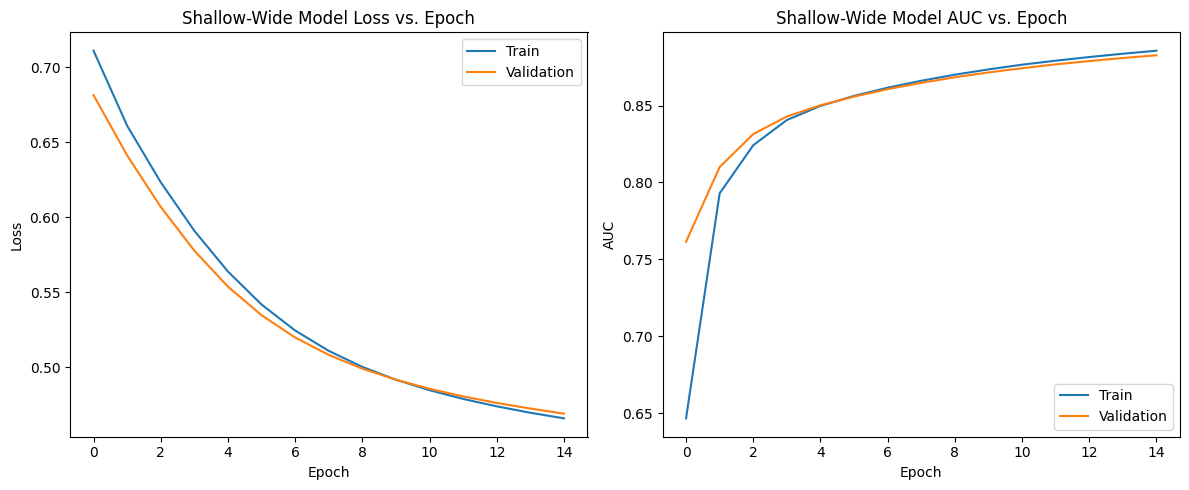

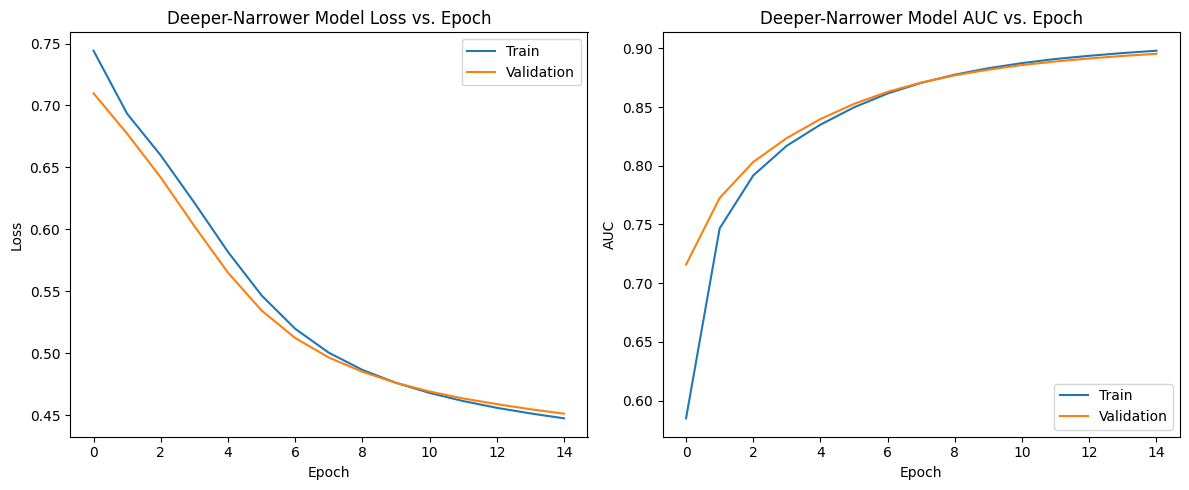

In [ ]:
# Plot training & validation loss values for the shallow-wide model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_shallow_wide.history['loss'])
plt.plot(history_shallow_wide.history['val_loss'])
plt.title('Shallow-Wide Model Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation AUC values for the shallow-wide model
plt.subplot(1, 2, 2)
plt.plot(history_shallow_wide.history['auc']) # Corrected metric name
plt.plot(history_shallow_wide.history['val_auc']) # Corrected metric name
plt.title('Shallow-Wide Model AUC vs. Epoch')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.tight_layout()
plt.show()

# Plot training & validation loss values for the deeper-narrower model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_deeper_narrower.history['loss'])
plt.plot(history_deeper_narrower.history['val_loss'])
plt.title('Deeper-Narrower Model Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation AUC values for the deeper-narrower model
plt.subplot(1, 2, 2)
plt.plot(history_deeper_narrower.history['auc_1']) # Corrected metric name
plt.plot(history_deeper_narrower.history['val_auc_1']) # Corrected metric name
plt.title('Deeper-Narrower Model AUC vs. Epoch')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.tight_layout()
plt.show()

## Visualization the plots



Generating learning curves for Shallow-Wide Model...
Training on subset size: 1000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Subset size 1000 - Train AUC: 0.5985, Val AUC: 0.6077
Training on subset size: 5000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Subset size 5000 - Train AUC: 0.7683, Val AUC: 0.7821
Training on subset size: 10000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Subset size 10000 - Train AUC: 0.8039, Val AUC: 0.8098
Training on subset size: 20000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Subset size 20000 - Train AUC: 0.8409, Val AUC: 0.8399
Training on subset size: 40000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Subset size 40000 - Train AUC: 0.8632, Val AUC: 0.8636
Training on subset size: 94447


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Subset size 94447 - Train AUC: 0.8883, Val AUC: 0.8908

Generating learning curves for Deeper-Narrower Model...
Training on subset size: 1000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Subset size 1000 - Train AUC: 0.5419, Val AUC: 0.5620
Training on subset size: 5000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Subset size 5000 - Train AUC: 0.7270, Val AUC: 0.7417
Training on subset size: 10000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Subset size 10000 - Train AUC: 0.7314, Val AUC: 0.7419
Training on subset size: 20000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Subset size 20000 - Train AUC: 0.8179, Val AUC: 0.8211
Training on subset size: 40000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Subset size 40000 - Train AUC: 0.8579, Val AUC: 0.8572
Training on subset size: 94447


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Subset size 94447 - Train AUC: 0.8937, Val AUC: 0.8948


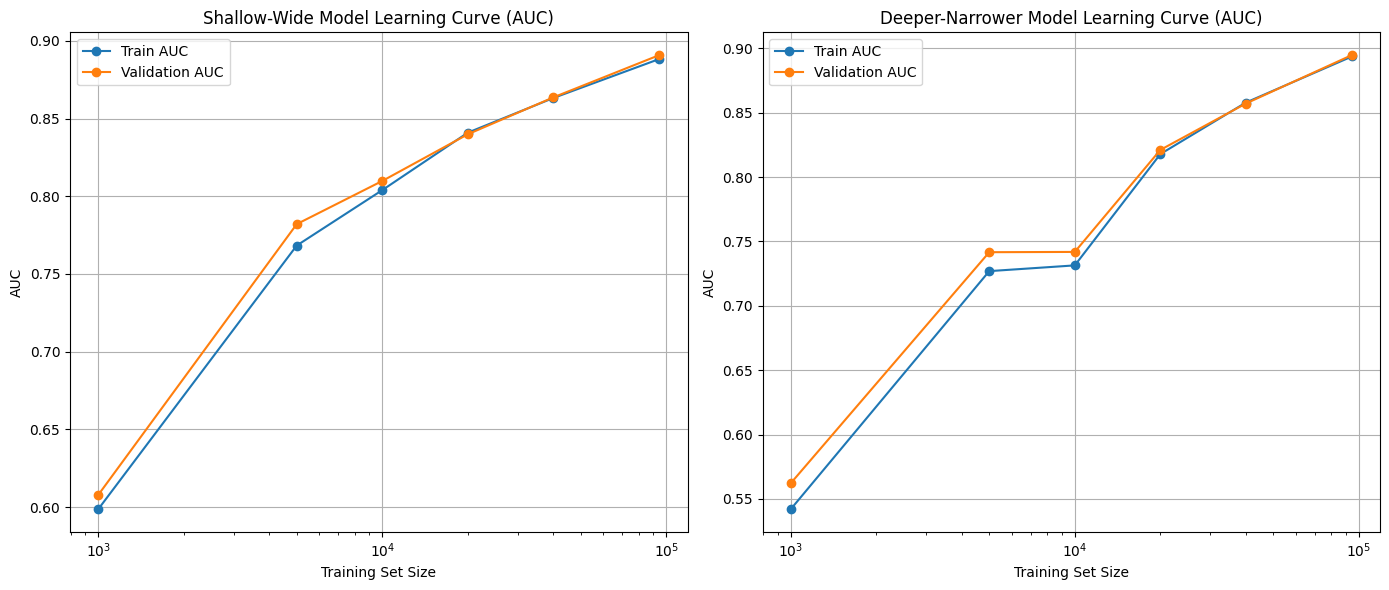

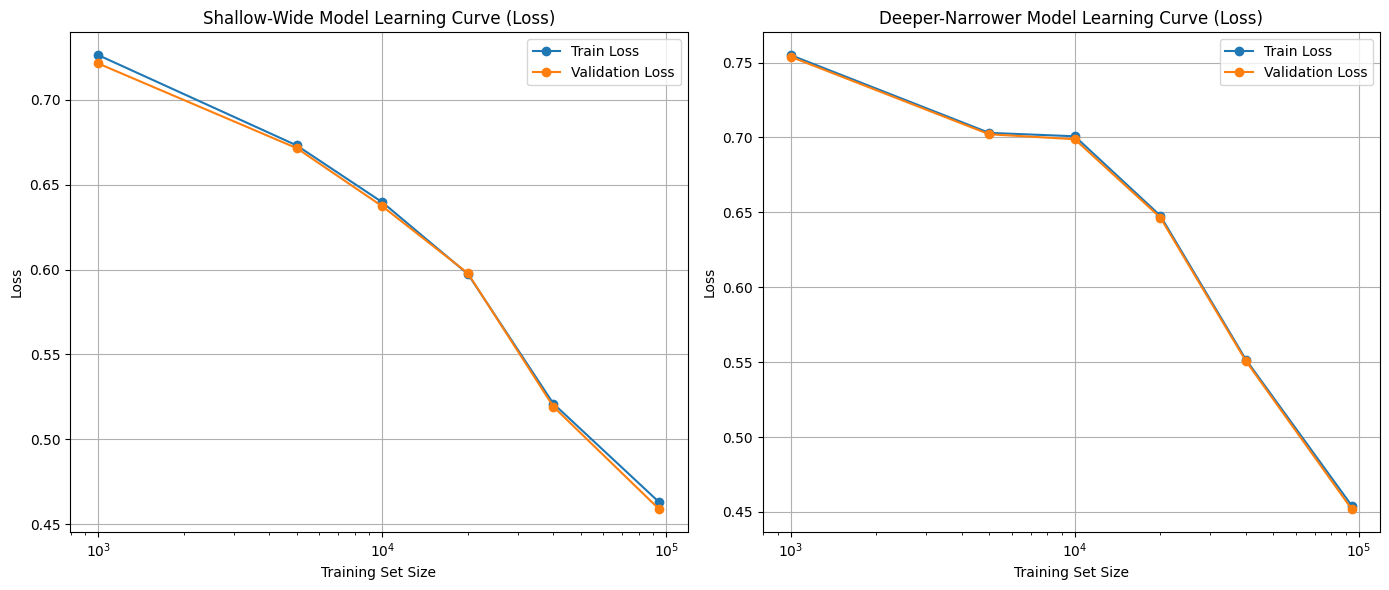

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf # Ensure tf is imported

def train_and_evaluate_subset(model_builder, X_train, y_train, X_test, y_test, train_sizes, l2_strength, optimizer_builder, loss, metrics, epochs, batch_size, patience):
    """
    Trains and evaluates a new instance of a model on varying subsets of the training data.

    Args:
        model_builder: A function that returns a *new* compiled Keras model.
                       This function should take l2_strength and input_shape as arguments.
        X_train: Full training features.
        y_train: Full training target.
        X_test: Full test features.
        y_test: Full test target.
        train_sizes: A list of training set sizes to use.
        l2_strength: The L2 regularization strength.
        optimizer_builder: A function that returns a *new* Keras optimizer instance.
        loss: The Keras loss function to use.
        metrics: A list of Keras metrics to track.
        epochs: Maximum number of epochs for training.
        batch_size: Batch size for training.
        patience: Patience for EarlyStopping.

    Returns:
        A dictionary containing lists of training and validation metrics for each training size.
    """
    train_losses, val_losses = [], []
    train_aucs, val_aucs = [], []

    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

    for size in train_sizes:
        print(f"Training on subset size: {size}")
        # Select a subset of the training data
        if size < len(X_train):
            X_train_subset = X_train.sample(n=size, random_state=42)
            y_train_subset = y_train.loc[X_train_subset.index]
        else:
            X_train_subset = X_train
            y_train_subset = y_train

        # Build a new instance of the model
        model = model_builder(l2_strength=l2_strength, input_shape=(X_train.shape[1],))

        # Create a *new* optimizer instance for this model
        optimizer = optimizer_builder()

        # Compile the model
        model.compile(optimizer=optimizer,
                      loss=loss,
                      metrics=metrics,
                      run_eagerly=True) # Explicitly set run_eagerly to True for compilation

        # Train the model on the subset
        history = model.fit(
            X_train_subset,
            y_train_subset,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.2, # Use a fixed validation split of the subset
            callbacks=[early_stopping],
            verbose=0 # Suppress verbose output for cleaner learning curve generation
        )

        # Evaluate on the training subset
        train_loss, train_acc, train_auc = model.evaluate(X_train_subset, y_train_subset, verbose=0)

        # Evaluate on the full test set
        val_loss, val_acc, val_auc = model.evaluate(X_test, y_test, verbose=0)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_aucs.append(train_auc)
        val_aucs.append(val_auc)

        print(f"Subset size {size} - Train AUC: {train_auc:.4f}, Val AUC: {val_auc:.4f}")


    return {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_aucs': train_aucs,
        'val_aucs': val_aucs
    }

# Define model builders for creating new instances
def build_shallow_wide_model(l2_strength, input_shape):
    model = Sequential([
        Dense(512, activation='relu', kernel_regularizer=l2(l2_strength), input_shape=input_shape),
        Dense(512, activation='relu', kernel_regularizer=l2(l2_strength)),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_deeper_narrower_model(l2_strength, input_shape):
    model = Sequential([
        Dense(256, activation='relu', kernel_regularizer=l2(l2_strength), input_shape=input_shape),
        Dense(256, activation='relu', kernel_regularizer=l2(l2_strength)),
        Dense(128, activation='relu', kernel_regularizer=l2(l2_strength)),
        Dense(128, activation='relu', kernel_regularizer=l2(l2_strength)),
        Dense(1, activation='sigmoid')
    ])
    return model

# Define parameters for learning curve generation
train_sizes = [1000, 5000, 10000, 20000, 40000, len(X_train)] # Varying training sizes
l2_strength = 1e-4
# Pass a builder function for the optimizer
optimizer_builder = lambda: SGD()
loss = BinaryCrossentropy()
metrics = ['accuracy', AUC()]
epochs = 15
batch_size = 1024
patience = 3

# Generate learning curves for the shallow-wide model
print("Generating learning curves for Shallow-Wide Model...")
shallow_wide_learning_curves = train_and_evaluate_subset(
    build_shallow_wide_model,
    X_train, y_train, X_test, y_test,
    train_sizes, l2_strength, optimizer_builder, loss, metrics, epochs, batch_size, patience
)

# Generate learning curves for the deeper-narrower model
print("\nGenerating learning curves for Deeper-Narrower Model...")
deeper_narrower_learning_curves = train_and_evaluate_subset(
    build_deeper_narrower_model,
    X_train, y_train, X_test, y_test,
    train_sizes, l2_strength, optimizer_builder, loss, metrics, epochs, batch_size, patience
)

# Plotting the learning curves (AUC)
plt.figure(figsize=(14, 6))

# Shallow-Wide Model AUC Learning Curve
plt.subplot(1, 2, 1)
plt.plot(train_sizes, shallow_wide_learning_curves['train_aucs'], marker='o', label='Train AUC')
plt.plot(train_sizes, shallow_wide_learning_curves['val_aucs'], marker='o', label='Validation AUC')
plt.title('Shallow-Wide Model Learning Curve (AUC)')
plt.xlabel('Training Set Size')
plt.ylabel('AUC')
plt.xscale('log') # Use log scale for training size for better visualization
plt.legend()
plt.grid(True)

# Deeper-Narrower Model AUC Learning Curve
plt.subplot(1, 2, 2)
plt.plot(train_sizes, deeper_narrower_learning_curves['train_aucs'], marker='o', label='Train AUC')
plt.plot(train_sizes, deeper_narrower_learning_curves['val_aucs'], marker='o', label='Validation AUC')
plt.title('Deeper-Narrower Model Learning Curve (AUC)')
plt.xlabel('Training Set Size')
plt.ylabel('AUC')
plt.xscale('log') # Use log scale for training size for better visualization
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting the learning curves (Loss)
plt.figure(figsize=(14, 6))

# Shallow-Wide Model Loss Learning Curve
plt.subplot(1, 2, 1)
plt.plot(train_sizes, shallow_wide_learning_curves['train_losses'], marker='o', label='Train Loss')
plt.plot(train_sizes, shallow_wide_learning_curves['val_losses'], marker='o', label='Validation Loss')
plt.title('Shallow-Wide Model Learning Curve (Loss)')
plt.xlabel('Training Set Size')
plt.ylabel('Loss')
plt.xscale('log') # Use log scale for training size for better visualization
plt.legend()
plt.grid(True)

# Deeper-Narrower Model Loss Learning Curve
plt.subplot(1, 2, 2)
plt.plot(train_sizes, deeper_narrower_learning_curves['train_losses'], marker='o', label='Train Loss')
plt.plot(train_sizes, deeper_narrower_learning_curves['val_losses'], marker='o', label='Validation Loss')
plt.title('Deeper-Narrower Model Learning Curve (Loss)')
plt.xlabel('Training Set Size')
plt.ylabel('Loss')
plt.xscale('log') # Use log scale for training size for better visualization
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Calibration/reliability plot


738/738 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
738/738 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


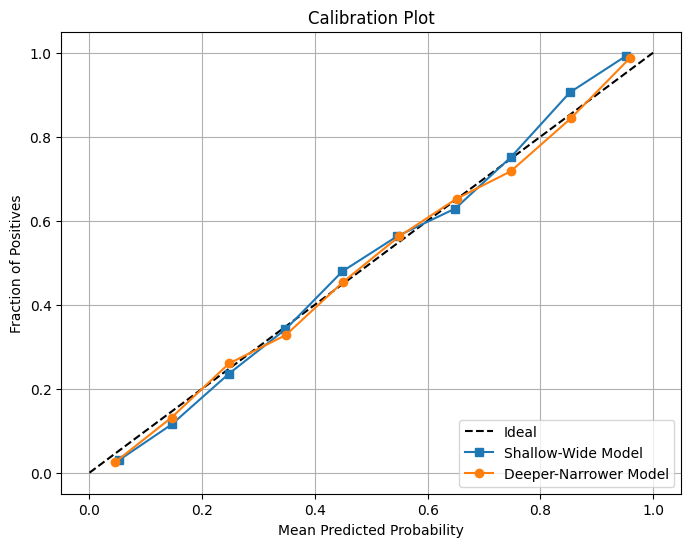

In [ ]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (is_canceled=1)
y_prob_shallow_wide = shallow_wide_model.predict(X_test).ravel()
y_prob_deeper_narrower = deeper_narrower_model.predict(X_test).ravel()

# Use calibration_curve to compute calibrated probabilities
fraction_of_positives_shallow_wide, mean_predicted_value_shallow_wide = calibration_curve(
    y_test, y_prob_shallow_wide, n_bins=10
)

fraction_of_positives_deeper_narrower, mean_predicted_value_deeper_narrower = calibration_curve(
    y_test, y_prob_deeper_narrower, n_bins=10
)

# Create the calibration plot
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Ideal') # Ideal calibration line
plt.plot(mean_predicted_value_shallow_wide, fraction_of_positives_shallow_wide, 's-', label='Shallow-Wide Model')
plt.plot(mean_predicted_value_deeper_narrower, fraction_of_positives_deeper_narrower, 'o-', label='Deeper-Narrower Model')

plt.title('Calibration Plot')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Threshold analysis



In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score

# Get predicted probabilities for the positive class (cancellation)
y_prob_shallow_wide = shallow_wide_model.predict(X_test).ravel()
y_prob_deeper_narrower = deeper_narrower_model.predict(X_test).ravel()

# Calculate precision, recall, and thresholds for the shallow-wide model
precision_sw, recall_sw, thresholds_sw = precision_recall_curve(y_test, y_prob_shallow_wide)

# Calculate F1-scores for each threshold for the shallow-wide model
f1_scores_sw = (2 * precision_sw * recall_sw) / (precision_sw + recall_sw)

# Find the optimal threshold (the one that maximizes the F1-score) for the shallow-wide model
optimal_threshold_index_sw = np.argmax(f1_scores_sw)
optimal_threshold_sw = thresholds_sw[optimal_threshold_index_sw]
optimal_f1_score_sw = f1_scores_sw[optimal_threshold_index_sw]

# Calculate precision, recall, and thresholds for the deeper-narrower model
precision_dn, recall_dn, thresholds_dn = precision_recall_curve(y_test, y_prob_deeper_narrower)

# Calculate F1-scores for each threshold for the deeper-narrower model
f1_scores_dn = (2 * precision_dn * recall_dn) / (precision_dn + recall_dn)

# Find the optimal threshold (the one that maximizes the F1-score) for the deeper-narrower model
optimal_threshold_index_dn = np.argmax(f1_scores_dn)
optimal_threshold_dn = thresholds_dn[optimal_threshold_index_dn]
optimal_f1_score_dn = f1_scores_dn[optimal_threshold_index_dn]

# Print the optimal threshold and F1-score for both models
print("Shallow-Wide Model:")
print(f"Optimal Threshold (maximizing F1-score): {optimal_threshold_sw:.4f}")
print(f"Corresponding Optimal F1-score: {optimal_f1_score_sw:.4f}")

print("\nDeeper-Narrower Model:")
print(f"Optimal Threshold (maximizing F1-score): {optimal_threshold_dn:.4f}")
print(f"Corresponding Optimal F1-score: {optimal_f1_score_dn:.4f}")

738/738 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
738/738 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Shallow-Wide Model:
Optimal Threshold (maximizing F1-score): 0.3866
Corresponding Optimal F1-score: 0.7496

Deeper-Narrower Model:
Optimal Threshold (maximizing F1-score): 0.4031
Corresponding Optimal F1-score: 0.7636


## Imbalance handling

In [ ]:
from sklearn.metrics import average_precision_score

# 1. Calculate the baseline PR-AUC
baseline_prauc = y_test.mean()

# 2. Calculate the PR-AUC for the shallow-wide model
prauc_shallow_wide = average_precision_score(y_test, y_prob_shallow_wide)

# 3. Calculate the PR-AUC for the deeper-narrower model
prauc_deeper_narrower = average_precision_score(y_test, y_prob_deeper_narrower)

# 4. Print the baseline PR-AUC and the model PR-AUCs
print(f"Baseline PR-AUC (Proportion of Positive Class): {baseline_prauc:.4f}")
print(f"Shallow-Wide Model PR-AUC: {prauc_shallow_wide:.4f}")
print(f"Deeper-Narrower Model PR-AUC: {prauc_deeper_narrower:.4f}")

Baseline PR-AUC (Proportion of Positive Class): 0.3735
Shallow-Wide Model PR-AUC: 0.8498
Deeper-Narrower Model PR-AUC: 0.8645


## Report activations


In [ ]:
# Report activation functions for the shallow-wide model
print("Activation functions in Shallow-Wide Model:")
for i, layer in enumerate(shallow_wide_model.layers):
    print(f"Layer {i+1} ({layer.name}): Activation: {layer.activation.__name__}")

# Report activation functions for the deeper-narrower model
print("\nActivation functions in Deeper-Narrower Model:")
for i, layer in enumerate(deeper_narrower_model.layers):
    print(f"Layer {i+1} ({layer.name}): Activation: {layer.activation.__name__}")

print("\nSummary of Activation Functions Used:")
print("- Both models used 'relu' activation for the hidden layers.")
print("- Both models used 'sigmoid' activation for the output layer.")

Activation functions in Shallow-Wide Model:
Layer 1 (dense): Activation: relu
Layer 2 (dense_1): Activation: relu
Layer 3 (dense_2): Activation: sigmoid

Activation functions in Deeper-Narrower Model:
Layer 1 (dense_3): Activation: relu
Layer 2 (dense_4): Activation: relu
Layer 3 (dense_5): Activation: relu
Layer 4 (dense_6): Activation: relu
Layer 5 (dense_7): Activation: sigmoid

Summary of Activation Functions Used:
- Both models used 'relu' activation for the hidden layers.
- Both models used 'sigmoid' activation for the output layer.
